In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



import warnings
warnings.simplefilter("ignore")

In [2]:
data=pd.read_csv(r"D:\ExcelR Data Science\Project\temperature_data.csv")

In [3]:
data.head()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
0,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,-0.250182,1.029572,-0.245860,-2.522071,-1.831422,-2.066143,-2.018033,4
1,-0.771263,-1.117021,0.329665,-1.297686,-1.222429,-0.249133,1.029509,-0.245832,-2.522418,-1.830969,-2.064859,-2.017631,4
2,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,-0.249431,1.029448,-0.245818,-2.522673,-1.830400,-2.064073,-2.017343,4
3,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,-0.248636,1.032845,-0.246955,-2.521639,-1.830333,-2.063137,-2.017632,4
4,-0.774043,-1.116775,0.335206,-1.303118,-1.222429,-0.248701,1.031807,-0.246610,-2.521900,-1.830498,-2.062795,-2.018145,4


In [4]:
data.shape

(998070, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998070 entries, 0 to 998069
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ambient         998070 non-null  float64
 1   coolant         998070 non-null  float64
 2   u_d             998070 non-null  float64
 3   u_q             998070 non-null  float64
 4   motor_speed     998070 non-null  float64
 5   torque          998070 non-null  float64
 6   i_d             998070 non-null  float64
 7   i_q             998070 non-null  float64
 8   pm              998070 non-null  float64
 9   stator_yoke     998070 non-null  float64
 10  stator_tooth    998070 non-null  float64
 11  stator_winding  998070 non-null  float64
 12  profile_id      998070 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 99.0 MB


In [6]:
data.describe()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
count,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000
mean,-0.003905,0.004723,0.004780,-0.005690,-0.006336,-0.003333,0.006043,-0.003194,-0.004396,0.000609,-0.002208,-0.003935,50.732001
std,0.993127,1.002423,0.997878,1.002330,1.001229,0.997907,0.998994,0.997912,0.995686,1.001049,0.999597,0.998343,22.073125
min,-8.573954,-1.429349,-1.655373,-1.861463,-1.371529,-3.345953,-3.245874,-3.341639,-2.631991,-1.834688,-2.066143,-2.019973,4.000000
25%,-0.599385,-1.037925,-0.826359,-0.927390,-0.951892,-0.266917,-0.756296,-0.257269,-0.672308,-0.747265,-0.761951,-0.725622,32.000000
50%,0.266157,-0.177187,0.267542,-0.099818,-0.140246,-0.187246,0.213935,-0.190076,0.094367,-0.057226,0.005085,0.006536,56.000000
75%,0.686675,0.650709,0.358491,0.852625,0.853584,0.547171,1.013975,0.499260,0.680691,0.697344,0.772239,0.725660,68.000000
max,2.967117,2.649032,2.274734,1.793498,2.024164,3.016971,1.060937,2.914185,2.917456,2.449158,2.326668,2.653781,81.000000


### Understanding the Features

     ambient--->Ambient Temp(The basic ambient temperature rating point of nearly all electric motors is 40° C.) Can Say Room Temp
     coolant---->Antifreeze ensures that your engine temperature remains stable to perform well in all climates.The coolant temperature for the battery must always be kept between 15 °C and 30 °C.
     u_d---->Direct Axis --Flux linkage component of current is aligned along the d axis(Voltage Component)
     u_q----?Quardartic axis --- torque component of current is aligned along the q axis((Voltage Component)
     Motor_Speed-->Speed of the motor
     torque  ---->the measure of the force that can cause an object to rotate about an axis. in other words amount of force
     i_d,i_q ----> Current quardintes
     pm---->Permanent Magnet surface temperature representing the rotor temperature. This was measured with an infrared thermography unit.
     stator_yoke--->The outer frame of a dc machine -- temperature is measured with a thermal sensor.
     Stator tooth --->temperature is measured with a thermal sensor.
     Stator winding ---->temperature measured with a thermal sensor.
     profile_id--->Each measurement session has a unique ID. Make sure not to try to estimate from one session onto the other as they are strongly independent.

     

### Exploratory Data Analysis

In [7]:
data.isnull().sum()

ambient           0
coolant           0
u_d               0
u_q               0
motor_speed       0
torque            0
i_d               0
i_q               0
pm                0
stator_yoke       0
stator_tooth      0
stator_winding    0
profile_id        0
dtype: int64

In [8]:
data.duplicated().sum()

0

I observe that zero value appears most frequently in columns representing coordinates for current and voltage

Coolant and ambient are measured in the same units. The highest peak of coolant is at the value 20 and the highest peak of of ambient is at the value 26. Values 20, 23 and 25 of ambient and 50 of coolant also have peaks

we can see pm,i_q,torque,u_d,ambient has oulier which will deal later

<AxesSubplot:>

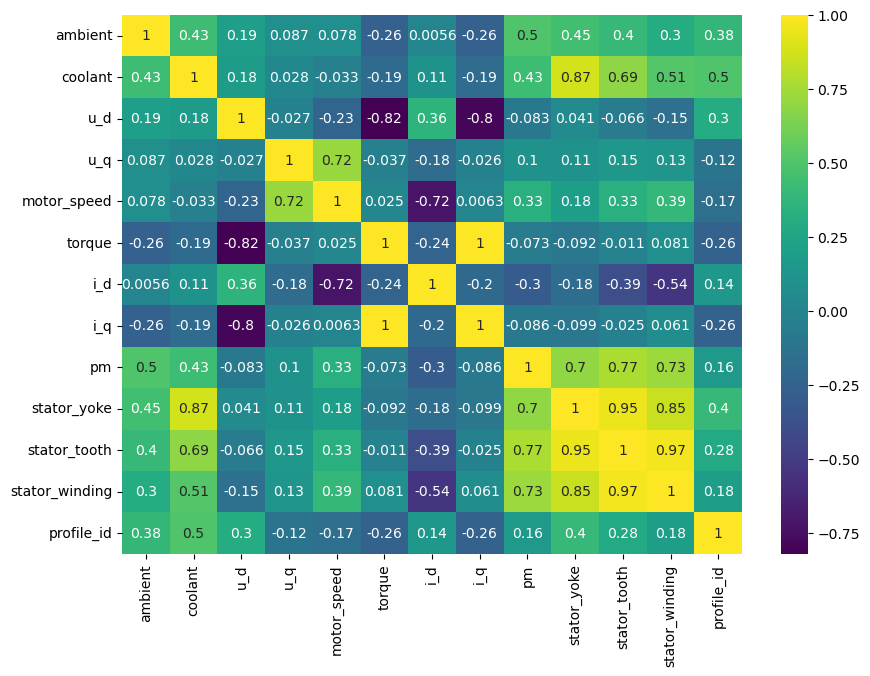

In [9]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True,cmap='viridis')

     
### Observations:

     stator_tooth, stator_winding and stator_yoke are correlated between themselfs
     
     torque has the maximum correlation coeff  1 with i_q, and strong negative correlation with u_d
     
     motor_speed has strong positive correlation with u_q and strong negative correlation with i_d
     
     stator_yoke is significantly correlated with coolant and less significantly with ambient
     
     stator_tooth and stator_winding have positive correlation with coolant and negative correlation with i_d
     
     i_q and u_d have strong negative correlation

In [10]:
def observe_3d_relationships(variable_x, variable_y, variable_z, ax):

    ax.set_xlabel('variable_x')
    ax.set_ylabel('variable_y')
    ax.set_zlabel('variable_z')

    x = data[variable_x]
    y = data[variable_y]
    z = data[variable_z]

    ax.scatter(x, y, z)

<AxesSubplot:>

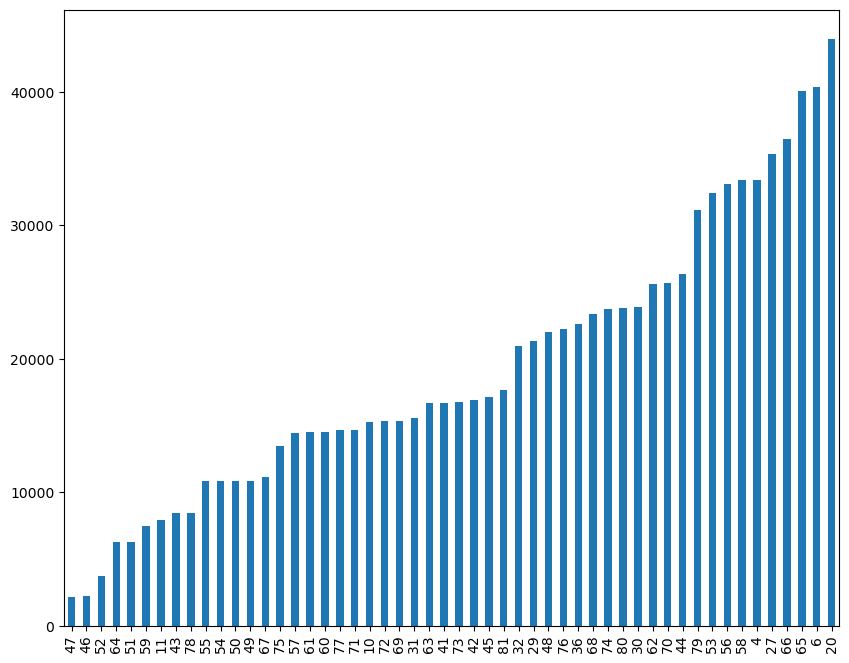

In [11]:
plt.figure(figsize=(10,8))
data['profile_id'].value_counts().sort_values().plot(kind='bar')

profilie_id 66,65,6,20 have most number of measurement recorded

As we can see from the the above plots, the mean and median for most of the plots are very close to each other. So the data seems to have low skewness for almost all variables.

## Checking Skewness and kurtosis numerically

In [12]:
import scipy.stats as stats

for i in data.columns:
    print(i,':\n Skewness:',data[i].skew(),':\n Kurtosis:',data[i].kurt(),'\n')

ambient :
 Skewness: -0.8489138249162917 :
 Kurtosis: 0.822426565610952 

coolant :
 Skewness: 0.6282471402211814 :
 Kurtosis: -0.7599463836890359 

u_d :
 Skewness: 0.19464403446801343 :
 Kurtosis: -0.5228583948458345 

u_q :
 Skewness: 0.19988508399235655 :
 Kurtosis: -1.271315718489302 

motor_speed :
 Skewness: 0.3333048472645522 :
 Kurtosis: -1.1669369999151742 

torque :
 Skewness: -0.042660488385365035 :
 Kurtosis: 0.7793178684855206 

i_d :
 Skewness: -0.62257797275636 :
 Kurtosis: -0.754099941976742 

i_q :
 Skewness: -0.07570538427941409 :
 Kurtosis: 0.7849738434370379 

pm :
 Skewness: -0.2329033950928521 :
 Kurtosis: -0.3492131725408121 

stator_yoke :
 Skewness: 0.2572973686790802 :
 Kurtosis: -0.7289625925727061 

stator_tooth :
 Skewness: -0.0615332410896644 :
 Kurtosis: -0.7799869810017213 

stator_winding :
 Skewness: -0.02805511318661168 :
 Kurtosis: -0.7284159974661613 

profile_id :
 Skewness: -0.6284123886037299 :
 Kurtosis: -0.6526614359734477 



In [13]:
#!pip install autoviz

In [14]:
#!pip install xlrd # Autoviz class - Dependency 

In [15]:
# OUTLIER TREATMENT
df = pd.read_csv(r"D:\ExcelR Data Science\Project\temperature_data.csv")
df1=df.copy()

# Function to detect outliers using Z-score
def detect_outliers_zscore(data):
    threshold = 3
    z_scores = np.abs((data - data.mean()) / data.std())
    return z_scores > threshold

# Loop through each column (except 'profile_id') to detect outliers and impute with mean
for col in df1.columns:
    if col != 'profile_id':
        outliers = detect_outliers_zscore(df1[col])
        if outliers.any():
            df1[col] = np.where(outliers, df1[col].mean(), df1[col])

# Save the modified DataFrame to a new CSV file (if needed)
# Replace 'imputed_dataset.csv' with the desired filename
df.to_csv('imputed_dataset.csv', index=False)


In [16]:
# Calculate the difference between the original DataFrame and the imputed DataFrame
difference_df = df - df1

# Check if the difference is non-zero to identify columns where outliers were imputed
outliers_imputed_mask = difference_df.abs() > 0

# Calculate the percentage of outliers imputed for each column
percentage_outliers_imputed = (outliers_imputed_mask.sum() / len(df)) * 100

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'Column Name': percentage_outliers_imputed.index,
    'Percentage of Outliers Imputed': percentage_outliers_imputed.values
})

print(results_df)

       Column Name  Percentage of Outliers Imputed
0          ambient                        0.276534
1          coolant                        0.000000
2              u_d                        0.000000
3              u_q                        0.000000
4      motor_speed                        0.000000
5           torque                        0.512890
6              i_d                        0.054405
7              i_q                        0.257597
8               pm                        0.000000
9      stator_yoke                        0.000000
10    stator_tooth                        0.000000
11  stator_winding                        0.000000
12      profile_id                        0.000000


Based on the results of the percentage of outliers imputed for each column,had a very low percentage of outliers imputed. The majority of the columns had a percentage of 0%, indicating that no outliers were imputed for those features.

The columns 'ambient', 'torque', 'i_d', and 'i_q' had small percentages of outliers imputed, but still relatively low, which suggests that only a small portion of their data was modified due to the imputation process.

columns 'coolant', 'u_d', 'u_q', 'motor_speed', 'pm', 'stator_yoke', 'stator_tooth', 'stator_winding', and 'profile_id' had no outliers imputed, meaning that their data remained unchanged during the imputation process.

Overall, it seems that the outlier imputation process was conservative and had a minimal impact on the dataset, which is a positive outcome. However, it's essential to interpret these results in the context of your specific analysis and understand the implications of the imputation on your data and any subsequent analyses.

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998070 entries, 0 to 998069
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ambient         998070 non-null  float64
 1   coolant         998070 non-null  float64
 2   u_d             998070 non-null  float64
 3   u_q             998070 non-null  float64
 4   motor_speed     998070 non-null  float64
 5   torque          998070 non-null  float64
 6   i_d             998070 non-null  float64
 7   i_q             998070 non-null  float64
 8   pm              998070 non-null  float64
 9   stator_yoke     998070 non-null  float64
 10  stator_tooth    998070 non-null  float64
 11  stator_winding  998070 non-null  float64
 12  profile_id      998070 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 99.0 MB


In [18]:
x=df1.drop(['motor_speed','stator_winding','profile_id'],axis=1)
y=df1['motor_speed']

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [20]:
sd=StandardScaler()
x=sd.fit_transform(x)

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [22]:
lm=LinearRegression()
lm.fit(x_train,y_train)
lm_pred=lm.predict(x_test)

In [23]:
print("MSE:",mean_squared_error(y_test,lm_pred))
print("MAE:",mean_absolute_error(y_test,lm_pred))
print("R2_Score:",r2_score(y_test,lm_pred))

MSE: 0.07883450785738827
MAE: 0.20882597787815801
R2_Score: 0.9213015288316063


In [24]:
XG=XGBRegressor()
XG.fit(x_train,y_train)
XG_pred=XG.predict(x_test)

print("MSE:",mean_squared_error(y_test,XG_pred))
print("MAE:",mean_absolute_error(y_test,XG_pred))
print("R2_Score:",r2_score(y_test,XG_pred))

MSE: 0.0004725622667046784
MAE: 0.010913157535925904
R2_Score: 0.999528253185917


In [25]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt_pred=dt.predict(x_test)

print("MSE:",mean_squared_error(y_test,dt_pred))
print("MAE:",mean_absolute_error(y_test,dt_pred))
print("R2_Score:",r2_score(y_test,dt_pred))

MSE: 0.00034915512778575
MAE: 0.006244343364162703
R2_Score: 0.9996514473736926


In [26]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)

print("MSE:",mean_squared_error(y_test,rf_pred))
print("MAE:",mean_absolute_error(y_test,rf_pred))
print("R2_Score:",r2_score(y_test,rf_pred))

MSE: 0.00017586874719312872
MAE: 0.00363553953589255
R2_Score: 0.9998244347316096


In [27]:
model=['Linear','DecisiionTree','RandomForest','XGBOOST']
accuracy=[r2_score(y_test,lm_pred),r2_score(y_test,dt_pred),r2_score(y_test,rf_pred),r2_score(y_test,XG_pred)]
acc=pd.DataFrame({'MLModel':model,
                 'Accuracy':accuracy})

In [29]:
sorted_df=acc.sort_values(by='Accuracy',ascending=False)
print(sorted_df)

         MLModel  Accuracy
2   RandomForest  0.999824
1  DecisiionTree  0.999651
3        XGBOOST  0.999528
0         Linear  0.921302
